In [1]:
import os, sys
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
d = os.getcwd()
p = os.path.dirname(d)

sys.path.append(p)

In [3]:
from src.dynamics import RobotWorld
from src.lqr import Lqr
from src.algorithms.adpgpd import ADpgpdSampled
from src.sampling import Sampler

In [4]:
ds = 4
da = 2

eta = 0.01
tau = 0.1
gamma = 0.9
alpha = 1.0

b = -1

G1 = - torch.tensor([
    [10.0, 0, 0, 0],
    [0, 10.0, 0, 0],
    [0, 0, .1, 0],
    [0, 0, 0, .1]
]).double()

R1 =  - torch.tensor([
    [1., 0],
    [0, 1.],
]).double() * (tau / 2)

G2 = - torch.tensor([
    [.1, 0, 0, 0],
    [0, .1, 0, 0],
    [0, 0, 10.0, 0],
    [0, 0, 0, 10.0]
]).double()

R2 = - torch.tensor([
    [1., 0],
    [0, 1.],
]).double() * (tau / 2)

# Unconstrained

In [8]:
epochs = 100
n_pe = 1_000
n_rho = 1_000
n_roll = 100

env = RobotWorld()
sampler = Sampler(env, gamma)
dpgpd = ADpgpdSampled(env, eta, tau, gamma, b, alpha, G1, G2, R1, R2)

K, losses_primal, losses_dual = dpgpd.train_unconstrained(epochs, n_pe, n_rho, n_roll)

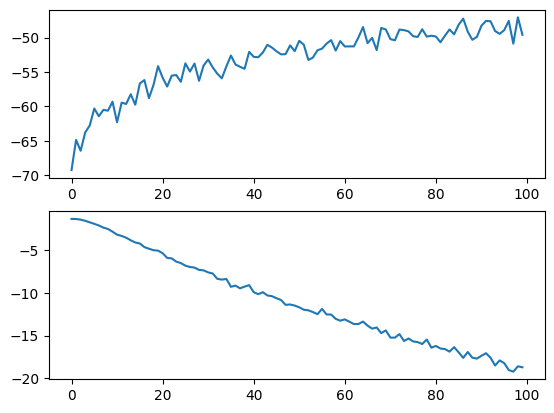

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes = axes.flatten()
axes[0].plot(losses_primal)
axes[1].plot(losses_dual)
plt.show()

# Constrained

In [8]:
epochs = 100
n_pe = 1_000
n_rho = 1_000
n_roll = 100
b = -20

env = RobotWorld()
sampler = Sampler(env, gamma)
dpgpd = ADpgpdSampled(env, eta, tau, gamma, b, alpha, G1, G2, R1, R2)

K, lmbda, losses_primal, losses_dual = dpgpd.train_constrained(epochs, n_pe, n_rho, n_roll)

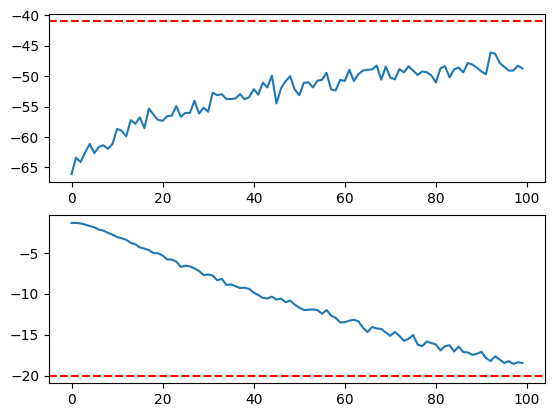

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes = axes.flatten()
axes[0].plot(losses_primal)
axes[0].axhline(y=-41, color='r', linestyle='--')
axes[1].plot(losses_dual)
axes[1].axhline(y=b, color='r', linestyle='--')
plt.show()